In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
forest_data = pd.read_csv('forestfires.csv')

In [3]:
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
forest_data.shape

(517, 31)

In [14]:
columns_to_drop = ['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']
forest_data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [15]:
forest_data.isnull().sum()


month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

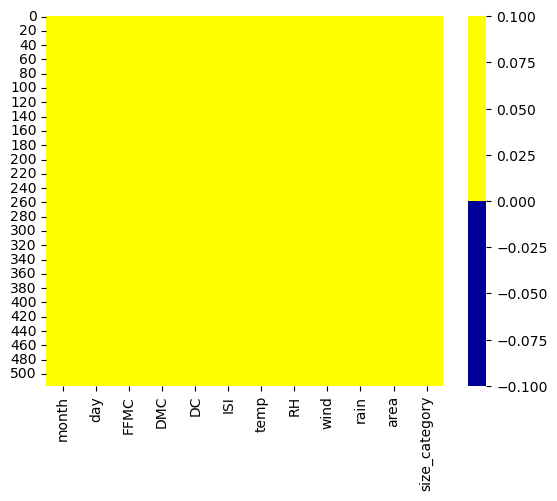

In [16]:
colours = ['#000099', '#ffff00']
pal = sns.color_palette(colours)
sns.heatmap(forest_data.isnull(), cmap=pal)
plt.show()
# No null values

In [17]:
## Droping the duplicates

In [18]:
forest_data = forest_data.drop_duplicates().reset_index(drop=True)
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [19]:
forest_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [20]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  size_category  509 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 47.8+ KB


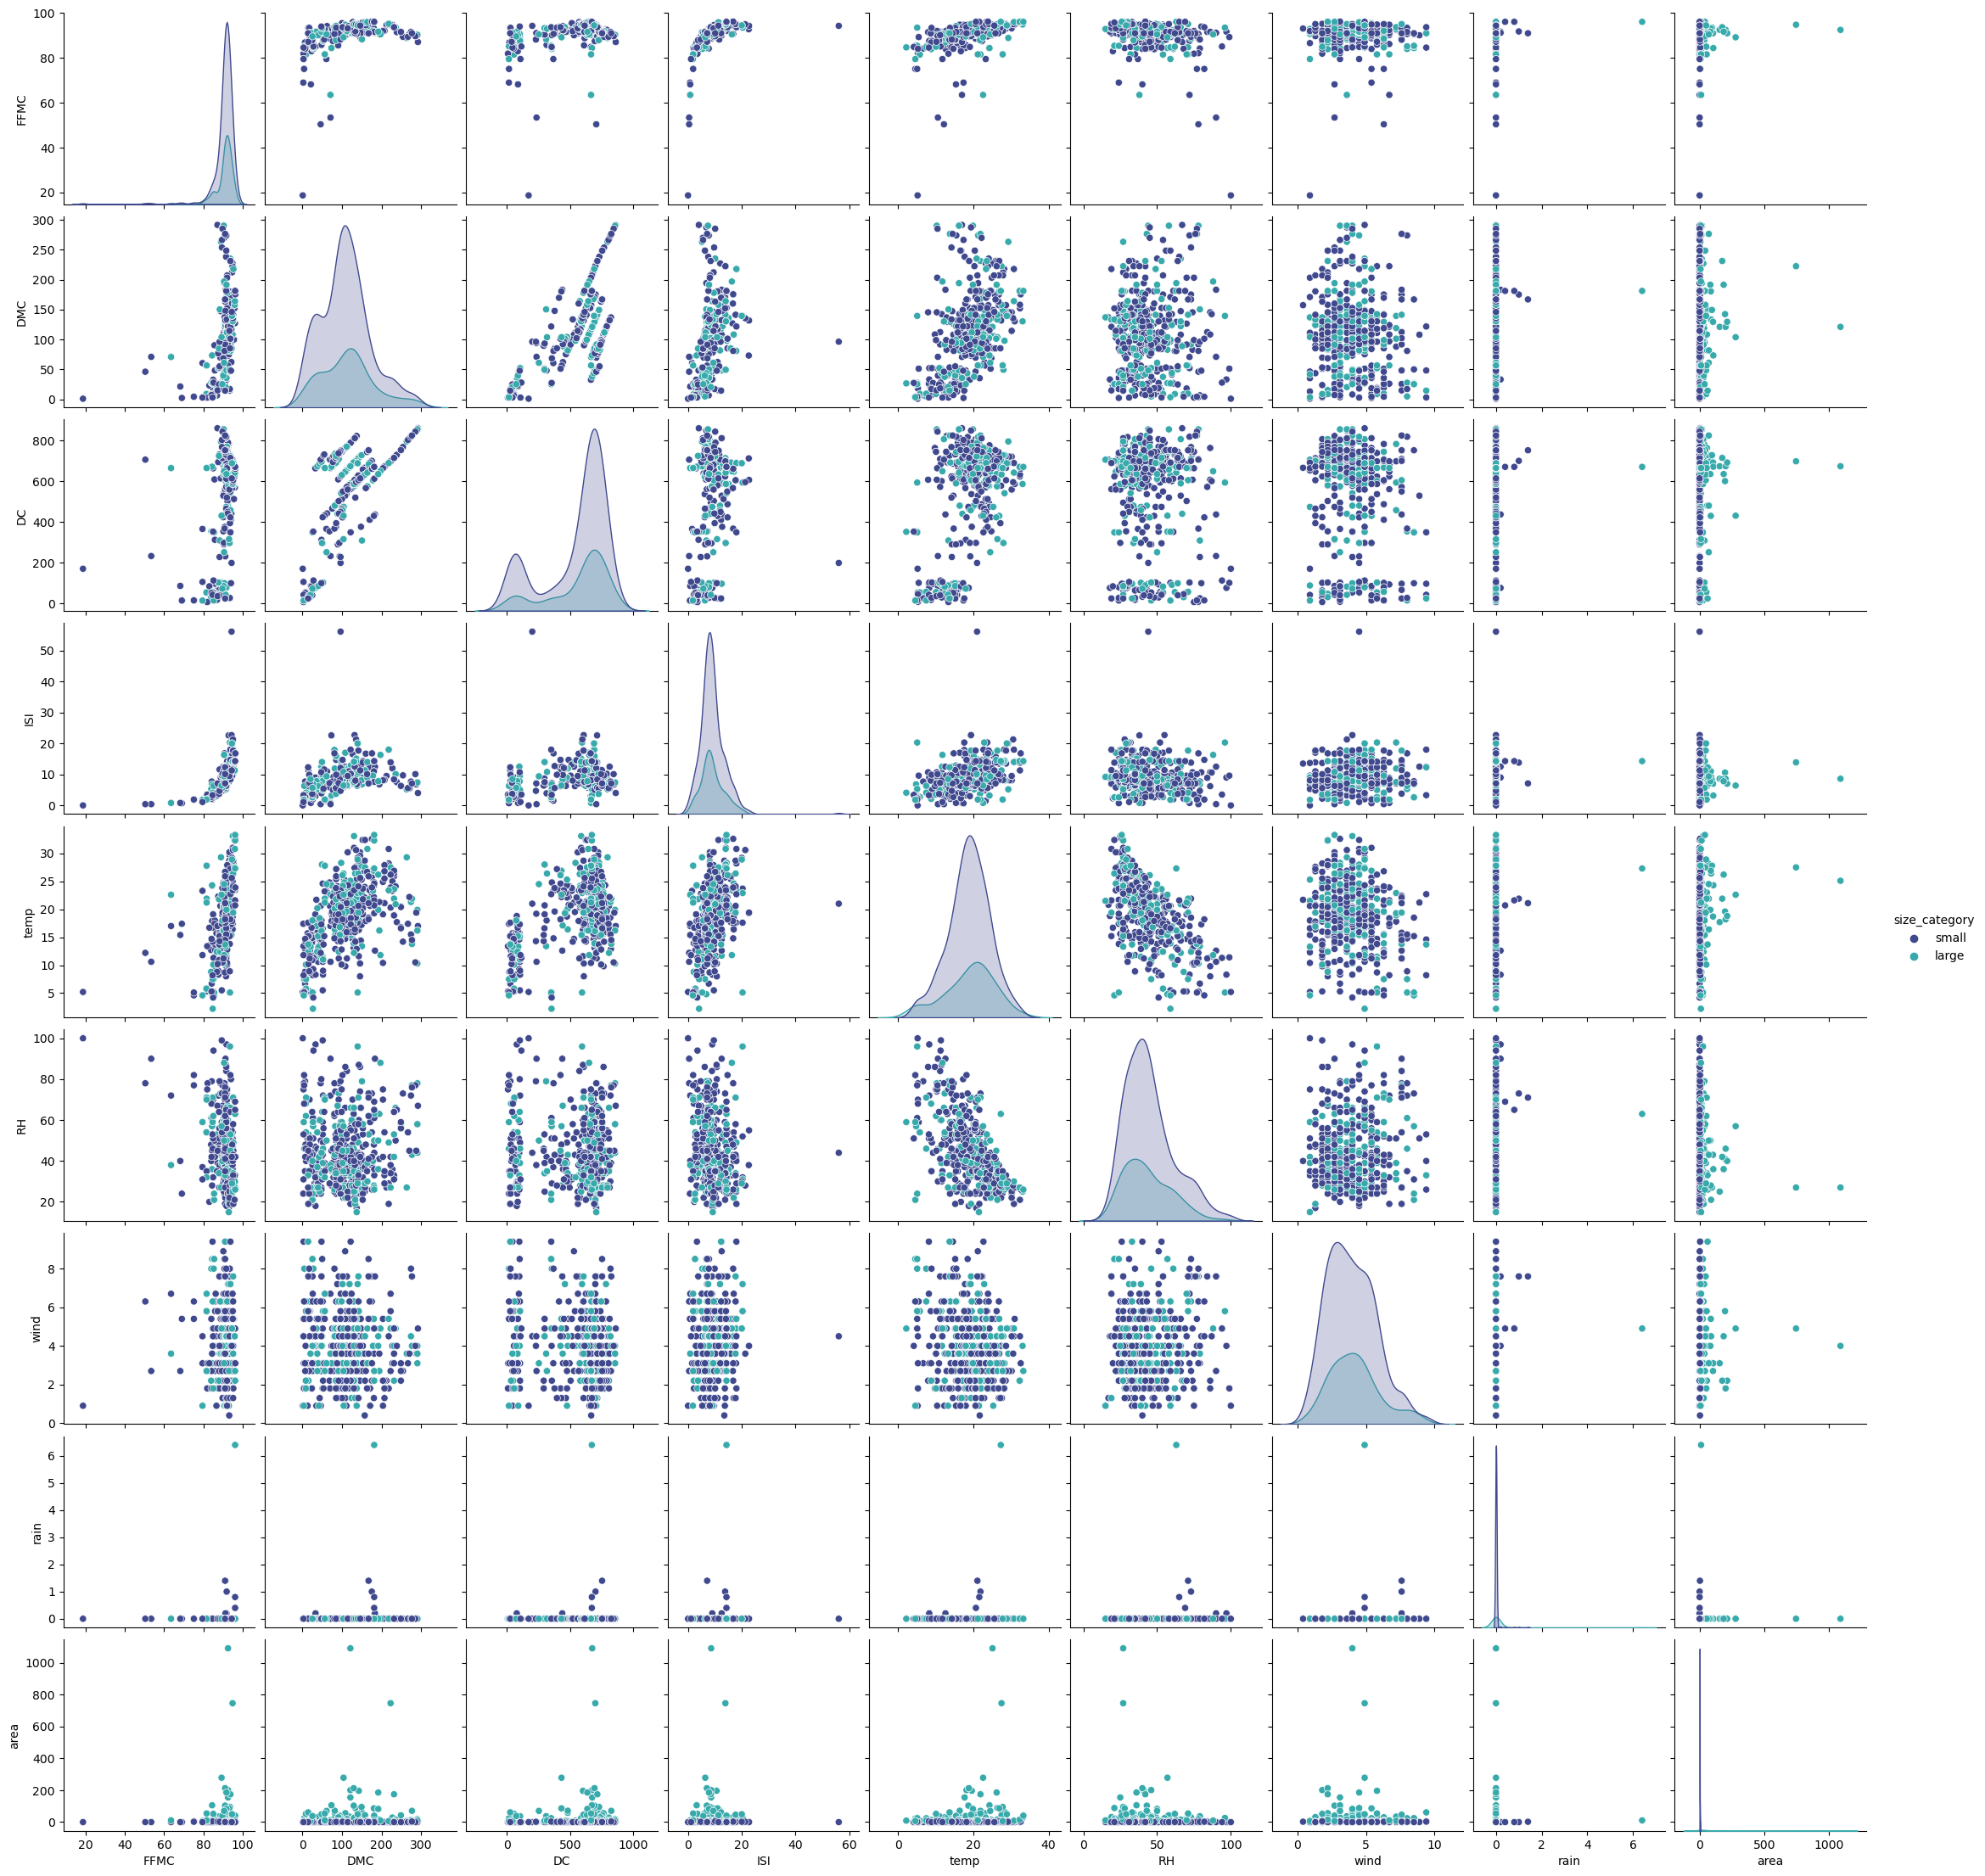

In [21]:
sns.pairplot(forest_data,palette='mako', hue='size_category')
plt.show()

In [22]:
forest_data.corr()

C:\Users\HP PAVILION\AppData\Local\Temp\ipykernel_7020\153481496.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  forest_data.corr()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


C:\Users\HP PAVILION\AppData\Local\Temp\ipykernel_7020\1570540372.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(forest_data.corr(), cmap='winter', annot=True)


[]

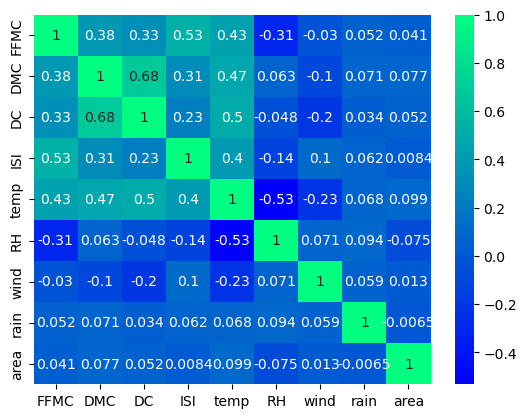

In [23]:
sns.heatmap(forest_data.corr(), cmap='winter', annot=True)
plt.plot()

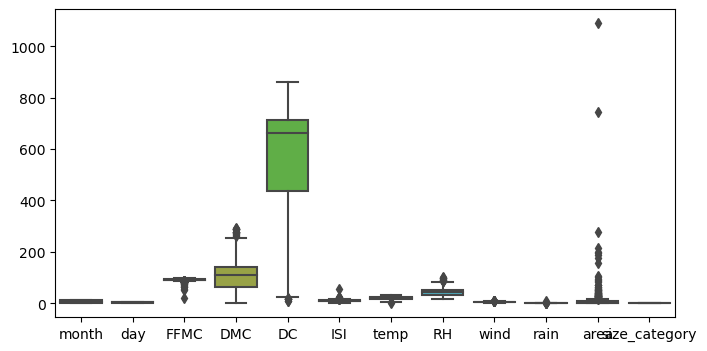

In [43]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data = forest_data)
plt.show()

<Axes: xlabel='month', ylabel='Count'>

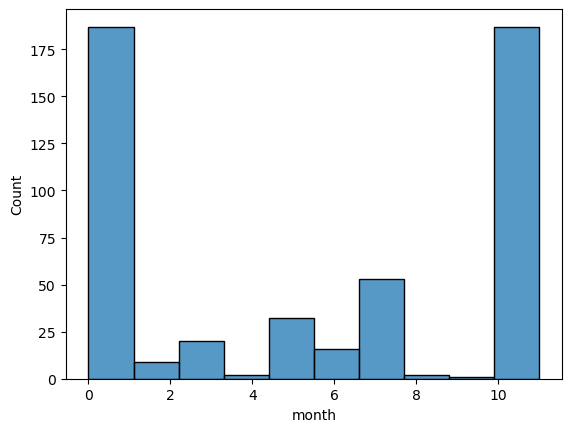

In [44]:
sns.histplot(forest_data['month'])

<Axes: xlabel='day', ylabel='Count'>

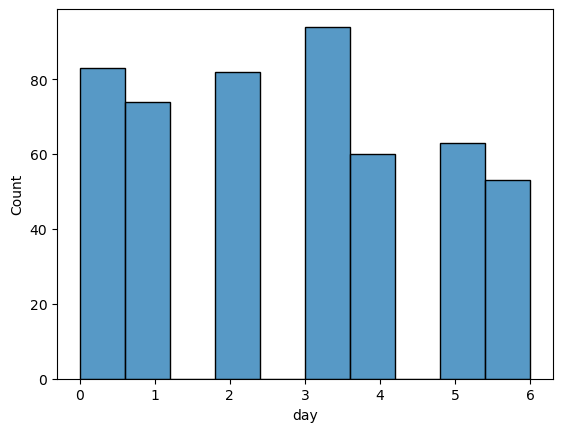

In [45]:
sns.histplot(forest_data['day'])

<Axes: xlabel='FFMC', ylabel='Count'>

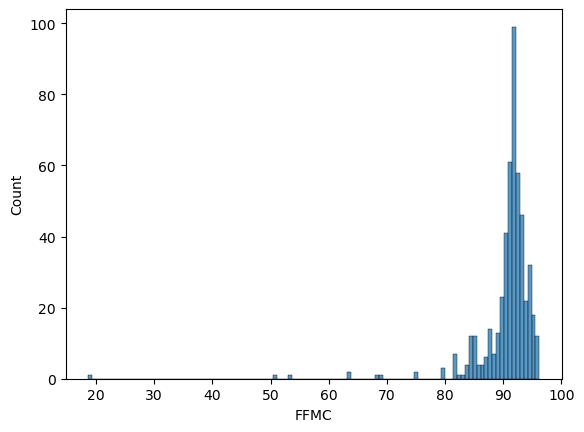

In [46]:
sns.histplot(forest_data['FFMC'])

<Axes: xlabel='DMC', ylabel='Count'>

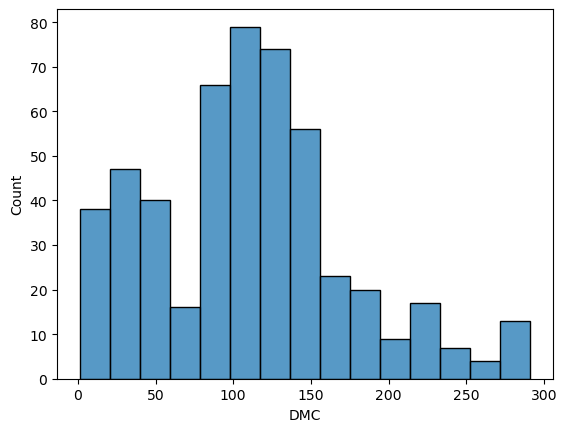

In [47]:
sns.histplot(forest_data['DMC'])

<Axes: xlabel='DC', ylabel='Count'>

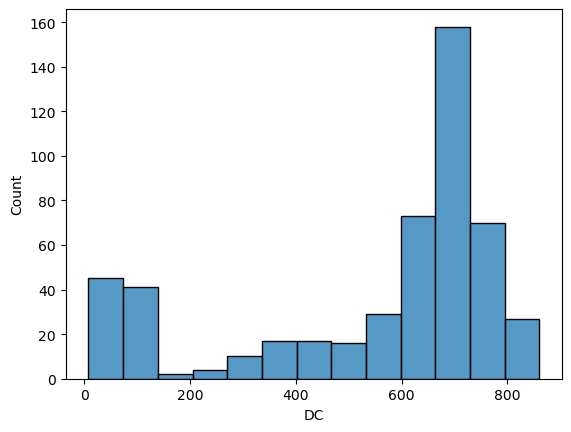

In [48]:
sns.histplot(forest_data['DC'])

<Axes: xlabel='ISI', ylabel='Count'>

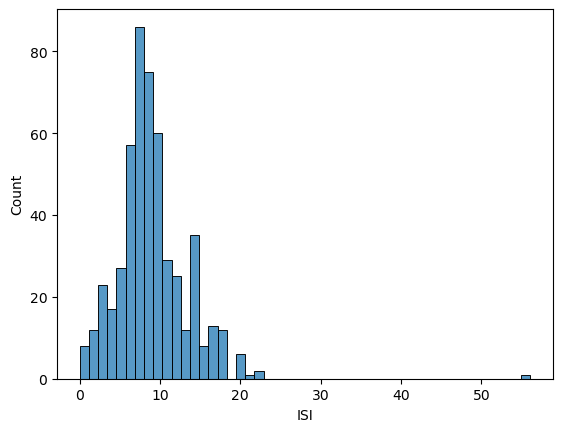

In [49]:
sns.histplot(forest_data['ISI'])

<Axes: xlabel='temp', ylabel='Count'>

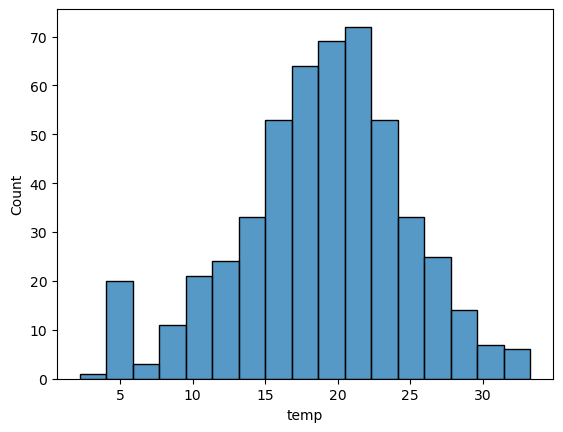

In [50]:
sns.histplot(forest_data['temp'])

<Axes: xlabel='rain', ylabel='Count'>

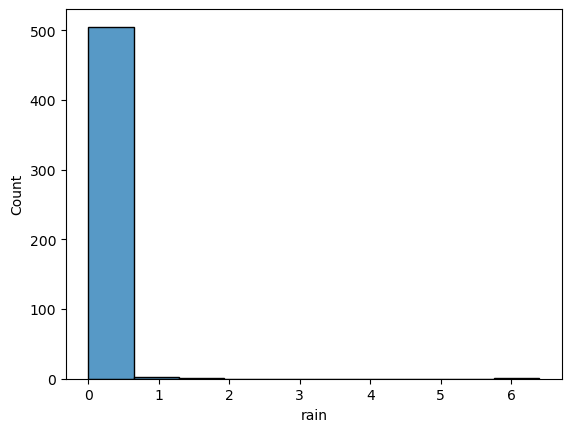

In [51]:
sns.histplot(forest_data['rain'])

<Axes: xlabel='RH', ylabel='Count'>

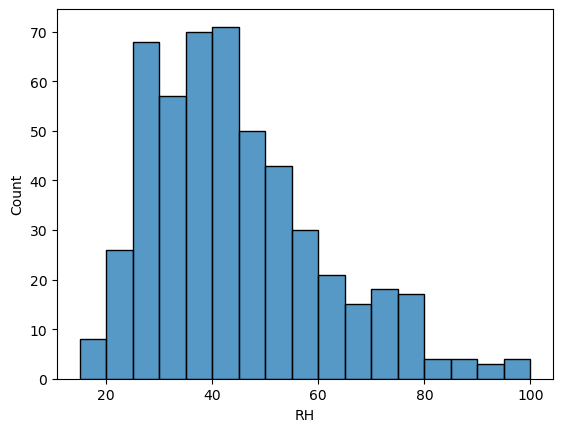

In [52]:
sns.histplot(forest_data['RH'])

<Axes: xlabel='wind', ylabel='Count'>

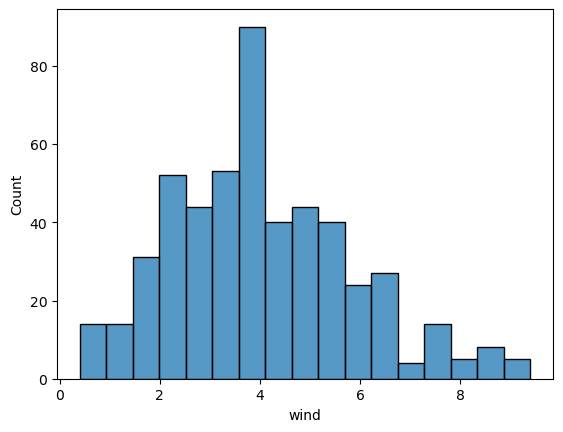

In [53]:
sns.histplot(forest_data['wind'])

<Axes: xlabel='area', ylabel='Count'>

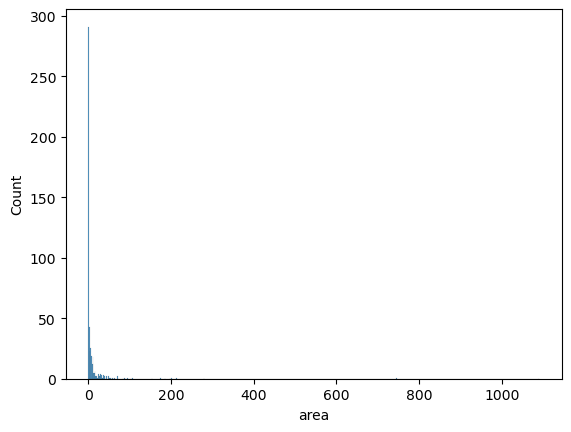

In [54]:
sns.histplot(forest_data['area'])

<Axes: xlabel='size_category', ylabel='Count'>

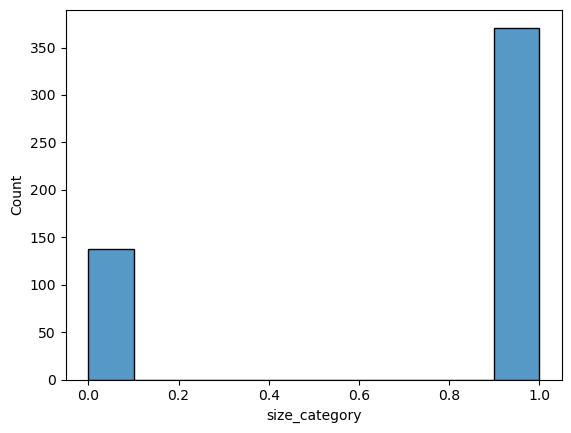

In [55]:
sns.histplot(forest_data['size_category'])

In [24]:
# Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

forest_data['month'] = le.fit_transform(forest_data['month'])
forest_data['day'] = le.fit_transform(forest_data['day'])
forest_data['size_category'] = le.fit_transform(forest_data['size_category'])


pd.set_option('display.max_columns', 500)
forest_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
504,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
505,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
506,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
507,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [25]:
X = forest_data.iloc[:,:11]
Y = forest_data['size_category']
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
504,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
505,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
506,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
507,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [26]:
# Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train_SC = sc.fit_transform(X_train)

X_test_SC = sc.transform(X_test)

In [27]:
y_train

506    0
137    1
422    1
329    1
412    0
      ..
106    1
270    0
348    1
435    1
102    1
Name: size_category, Length: 407, dtype: int32

In [28]:
#!pip install tensorflow


In [29]:
#Building the model

In [30]:
import tensorflow as tf

In [31]:
from keras.layers import Dense

In [32]:
from keras.models import Sequential

In [33]:
model = Sequential() #Initializing the ANN

In [34]:
# Adding the input layer
model.add(Dense(15,input_dim=11,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(12,activation='relu'))
#Adding the output layer
model.add(Dense(1,activation='sigmoid'))

In [35]:
#Compiling
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
history = model.fit(X_train_SC,y_train, validation_split=0.2,batch_size=50,epochs=150)

Epoch 1/150
7/7 [==============================] - 3s 101ms/step - loss: 0.7062 - accuracy: 0.4308 - val_loss: 0.6891 - val_accuracy: 0.5122
Epoch 2/150
7/7 [==============================] - 0s 18ms/step - loss: 0.6824 - accuracy: 0.6277 - val_loss: 0.6658 - val_accuracy: 0.7073
Epoch 3/150
7/7 [==============================] - 0s 18ms/step - loss: 0.6622 - accuracy: 0.7169 - val_loss: 0.6470 - val_accuracy: 0.7439
Epoch 4/150
7/7 [==============================] - 0s 19ms/step - loss: 0.6458 - accuracy: 0.7385 - val_loss: 0.6318 - val_accuracy: 0.7683
Epoch 5/150
7/7 [==============================] - 0s 16ms/step - loss: 0.6316 - accuracy: 0.7323 - val_loss: 0.6197 - val_accuracy: 0.7561
Epoch 6/150
7/7 [==============================] - 0s 19ms/step - loss: 0.6210 - accuracy: 0.7292 - val_loss: 0.6096 - val_accuracy: 0.7561
Epoch 7/150
7/7 [==============================] - 0s 16ms/step - loss: 0.6110 - accuracy: 0.7231 - val_loss: 0.6011 - val_accuracy: 0.7561
Epoch 8/150
7/7 [==

7/7 [==============================] - 0s 16ms/step - loss: 0.2547 - accuracy: 0.8985 - val_loss: 0.3505 - val_accuracy: 0.8659
Epoch 60/150
7/7 [==============================] - 0s 17ms/step - loss: 0.2469 - accuracy: 0.9015 - val_loss: 0.3467 - val_accuracy: 0.8780
Epoch 61/150
7/7 [==============================] - 0s 17ms/step - loss: 0.2402 - accuracy: 0.9015 - val_loss: 0.3420 - val_accuracy: 0.8780
Epoch 62/150
7/7 [==============================] - 0s 16ms/step - loss: 0.2316 - accuracy: 0.9046 - val_loss: 0.3382 - val_accuracy: 0.8780
Epoch 63/150
7/7 [==============================] - 0s 17ms/step - loss: 0.2260 - accuracy: 0.9108 - val_loss: 0.3326 - val_accuracy: 0.8659
Epoch 64/150
7/7 [==============================] - 0s 16ms/step - loss: 0.2182 - accuracy: 0.9169 - val_loss: 0.3290 - val_accuracy: 0.8659
Epoch 65/150
7/7 [==============================] - 0s 19ms/step - loss: 0.2123 - accuracy: 0.9200 - val_loss: 0.3241 - val_accuracy: 0.8659
Epoch 66/150
7/7 [========

7/7 [==============================] - 0s 17ms/step - loss: 0.0417 - accuracy: 0.9908 - val_loss: 0.1909 - val_accuracy: 0.9390
Epoch 118/150
7/7 [==============================] - 0s 18ms/step - loss: 0.0403 - accuracy: 0.9908 - val_loss: 0.1911 - val_accuracy: 0.9390
Epoch 119/150
7/7 [==============================] - 0s 18ms/step - loss: 0.0392 - accuracy: 0.9938 - val_loss: 0.1916 - val_accuracy: 0.9390
Epoch 120/150
7/7 [==============================] - 0s 18ms/step - loss: 0.0377 - accuracy: 0.9969 - val_loss: 0.1920 - val_accuracy: 0.9390
Epoch 121/150
7/7 [==============================] - 0s 17ms/step - loss: 0.0369 - accuracy: 0.9938 - val_loss: 0.1913 - val_accuracy: 0.9390
Epoch 122/150
7/7 [==============================] - 0s 16ms/step - loss: 0.0359 - accuracy: 0.9938 - val_loss: 0.1903 - val_accuracy: 0.9390
Epoch 123/150
7/7 [==============================] - 0s 16ms/step - loss: 0.0352 - accuracy: 0.9938 - val_loss: 0.1878 - val_accuracy: 0.9390
Epoch 124/150
7/7 [=

In [37]:
train_pred = model.predict(X_train_SC)
test_pred = model.predict(X_test_SC)

4/4 [==============================] - 0s 8ms/step


In [38]:
train_pred = (train_pred>0.5)
test_pred = (test_pred>0.5)


In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix

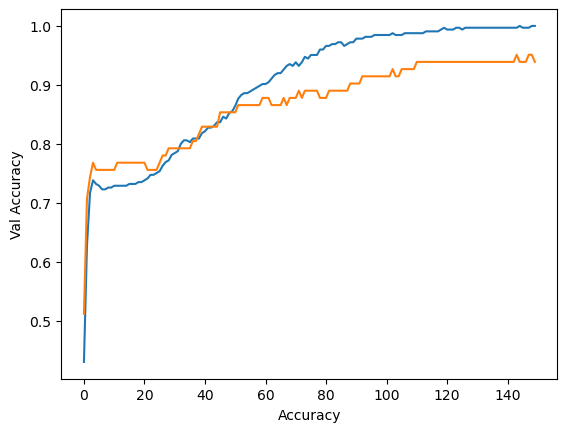

In [40]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Val Accuracy')
plt.show()

In [41]:
accuracy_score(y_train,train_pred)
# Accuracy on train data

0.9877149877149877

In [42]:
accuracy_score(y_test,test_pred)
# Accuracy on test data

0.9117647058823529